# AI Job Threat Analysis

This notebook explores how AI is impacting jobs through various lenses: employee expectations, reskilling, productivity, demographics, geography, automation, and global skill penetration.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10


## 1. Employee Change Expectations Over Time

Comparing how companies' expectations for workforce changes have shifted from 2023 to 2024.


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


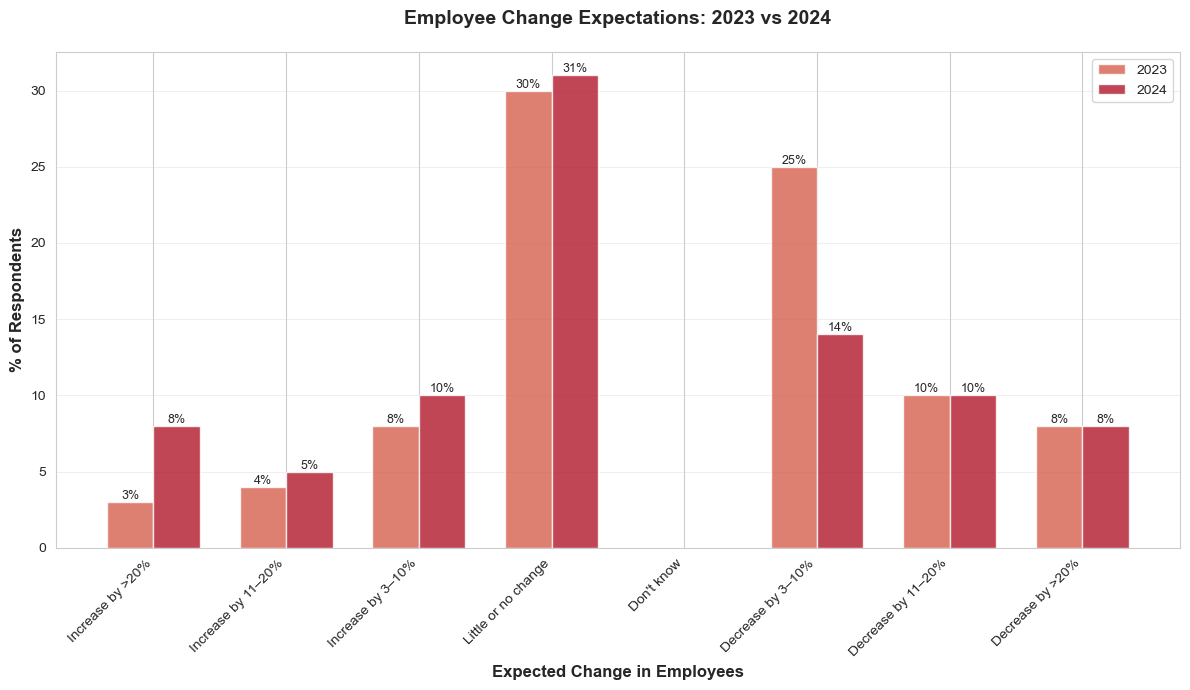

In [2]:
# Load data
df_employee_change = pd.read_csv('../data/4. Economy/Data/fig_4.4.13.csv')

# Filter for employee change data only
employee_data = df_employee_change[df_employee_change['Expectation type'] == 'Change in Employees'].copy()

# Clean percentage values
employee_data['% of respondents'] = employee_data['% of respondents'].str.rstrip('%').astype(float)

# Create order for responses
response_order = [
    'Increase by >20%',
    'Increase by 11–20%',
    'Increase by 3–10%',
    'Little or no change',
    "Don't know",
    'Decrease by 3–10%',
    'Decrease by 11–20%',
    'Decrease by >20%'
]

# Pivot for grouped bar chart
pivot_data = employee_data.pivot(index='Response', columns='Year', values='% of respondents')
pivot_data = pivot_data.reindex(response_order)

# Create visualization
fig, ax = plt.subplots(figsize=(12, 7))
x = np.arange(len(pivot_data.index))
width = 0.35

bars1 = ax.bar(x - width/2, pivot_data[2023], width, label='2023', color='#d6604d', alpha=0.8)
bars2 = ax.bar(x + width/2, pivot_data[2024], width, label='2024', color='#b2182b', alpha=0.8)

ax.set_xlabel('Expected Change in Employees', fontsize=12, fontweight='bold')
ax.set_ylabel('% of Respondents', fontsize=12, fontweight='bold')
ax.set_title('Employee Change Expectations: 2023 vs 2024', fontsize=14, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(pivot_data.index, rotation=45, ha='right')
ax.legend()
ax.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.0f}%',
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


## 2. Reskilling Rates

Showing the percentage of employees being reskilled, comparing 2023 and 2024.


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


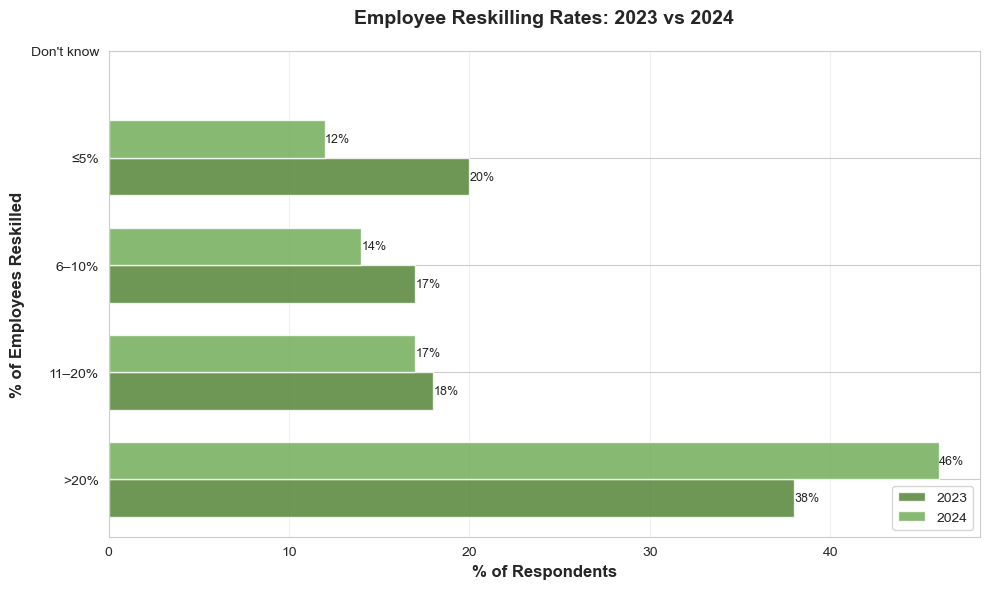

In [3]:
# Filter for reskilling data
reskill_data = df_employee_change[df_employee_change['Expectation type'] == 'Reskilled'].copy()
reskill_data['% of respondents'] = reskill_data['% of respondents'].str.rstrip('%').astype(float)

# Create order for reskilling categories
reskill_order = ['>20%', '11–20%', '6–10%', '≤5%', "Don't know"]

# Pivot data
pivot_reskill = reskill_data.pivot(index='Response', columns='Year', values='% of respondents')
pivot_reskill = pivot_reskill.reindex(reskill_order)

# Create horizontal bar chart
fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(pivot_reskill.index))
width = 0.35

bars1 = ax.barh(x - width/2, pivot_reskill[2023], width, label='2023', color='#4a7c2a', alpha=0.8)
bars2 = ax.barh(x + width/2, pivot_reskill[2024], width, label='2024', color='#6ba84f', alpha=0.8)

ax.set_xlabel('% of Respondents', fontsize=12, fontweight='bold')
ax.set_ylabel('% of Employees Reskilled', fontsize=12, fontweight='bold')
ax.set_title('Employee Reskilling Rates: 2023 vs 2024', fontsize=14, fontweight='bold', pad=20)
ax.set_yticks(x)
ax.set_yticklabels(pivot_reskill.index)
ax.legend()
ax.grid(axis='x', alpha=0.3)

# Add value labels
for bars in [bars1, bars2]:
    for bar in bars:
        width_val = bar.get_width()
        ax.text(width_val, bar.get_y() + bar.get_height()/2.,
                f'{width_val:.0f}%',
                ha='left', va='center', fontsize=9)

plt.tight_layout()
plt.show()


## 3. Productivity Gains Distribution

Distribution of productivity gains reported by companies using AI.


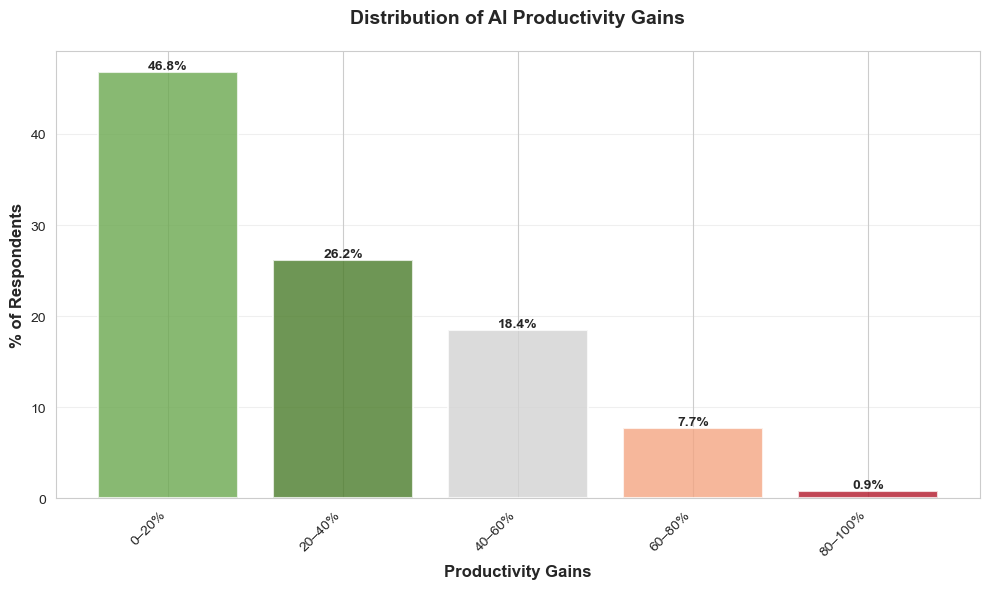

In [4]:
# Load productivity data
df_productivity = pd.read_csv('../data/4. Economy/Data/fig_4.4.11.csv')

# Clean percentage values
df_productivity['% of respondents'] = df_productivity['% of respondents'].str.rstrip('%').astype(float)

# Create bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Color gradient from green (low) to red (high)
colors = ['#6ba84f', '#4a7c2a', '#d3d3d3', '#f4a582', '#b2182b']

bars = ax.bar(df_productivity['Productivity gains'], df_productivity['% of respondents'], 
              color=colors, alpha=0.8, edgecolor='white', linewidth=1.5)

ax.set_xlabel('Productivity Gains', fontsize=12, fontweight='bold')
ax.set_ylabel('% of Respondents', fontsize=12, fontweight='bold')
ax.set_title('Distribution of AI Productivity Gains', fontsize=14, fontweight='bold', pad=20)
ax.grid(axis='y', alpha=0.3)

# Add value labels
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.1f}%',
            ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## 4. Gender Gap in AI Jobs

Tracking the representation of women and men in AI talent over time (2016-2024).


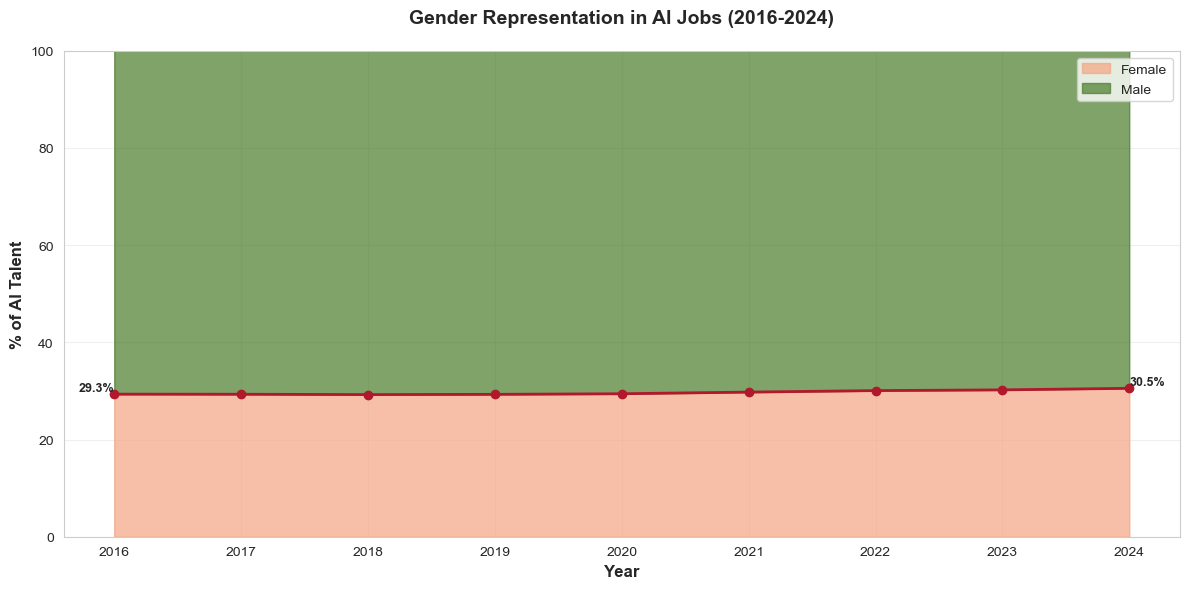

In [5]:
# Load gender data
df_gender = pd.read_csv('../data/4. Economy/Data/fig_4.2.20.csv')

# Clean percentage values
df_gender['AI talent representation'] = df_gender['AI talent representation'].str.rstrip('%').astype(float)

# Pivot data
gender_pivot = df_gender.pivot(index='Year', columns='Gender', values='AI talent representation')

# Create stacked area chart
fig, ax = plt.subplots(figsize=(12, 6))

ax.fill_between(gender_pivot.index, 0, gender_pivot['Female'], 
                 label='Female', color='#f4a582', alpha=0.7)
ax.fill_between(gender_pivot.index, gender_pivot['Female'], 100, 
                 label='Male', color='#4a7c2a', alpha=0.7)

# Add line for female percentage
ax.plot(gender_pivot.index, gender_pivot['Female'], color='#b2182b', linewidth=2, marker='o', markersize=6)

ax.set_xlabel('Year', fontsize=12, fontweight='bold')
ax.set_ylabel('% of AI Talent', fontsize=12, fontweight='bold')
ax.set_title('Gender Representation in AI Jobs (2016-2024)', fontsize=14, fontweight='bold', pad=20)
ax.set_ylim(0, 100)
ax.legend(loc='upper right')
ax.grid(alpha=0.3)

# Add percentage labels for 2016 and 2024
ax.text(2016, gender_pivot.loc[2016, 'Female'], f"{gender_pivot.loc[2016, 'Female']:.1f}%", 
        ha='right', va='bottom', fontsize=9, fontweight='bold')
ax.text(2024, gender_pivot.loc[2024, 'Female'], f"{gender_pivot.loc[2024, 'Female']:.1f}%", 
        ha='left', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()


## 5. Geographic Concentration of AI Jobs

Showing the percentage of US AI job postings by state, highlighting geographic inequality.


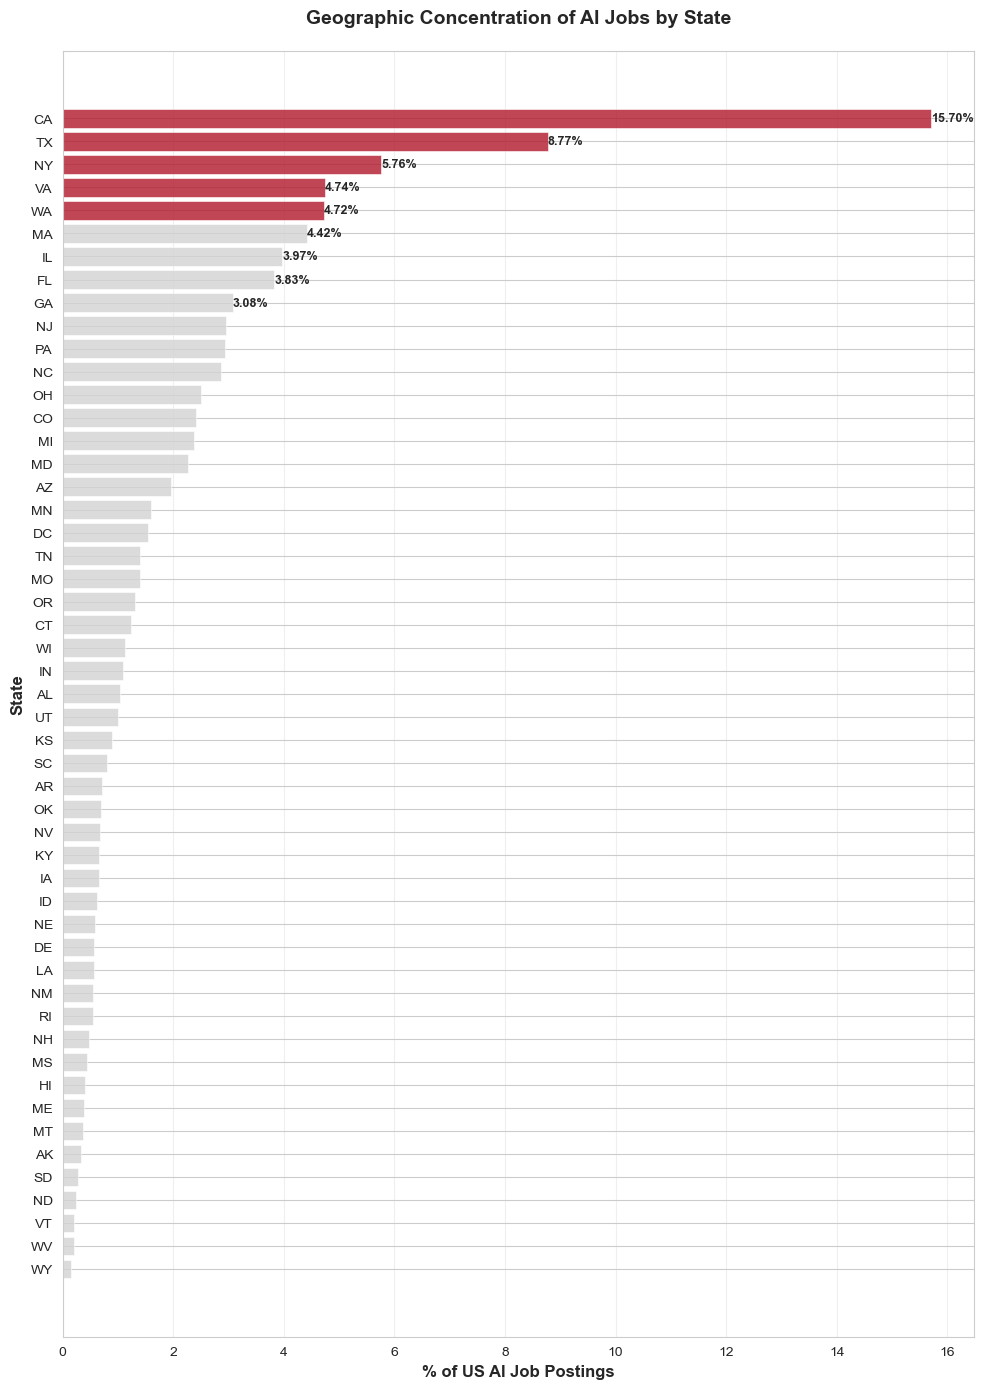


Top 5 States by AI Job Postings:
State code  Percentage of US AI job postings
        CA                             15.70
        TX                              8.77
        NY                              5.76
        VA                              4.74
        WA                              4.72


In [6]:
# Load state data
df_states = pd.read_csv('../data/4. Economy/Data/fig_4.2.10.csv')

# Clean percentage values
df_states['Percentage of US AI job postings'] = df_states['Percentage of US AI job postings'].str.rstrip('%').astype(float)

# Sort by percentage
df_states_sorted = df_states.sort_values('Percentage of US AI job postings', ascending=True)

# Create horizontal bar chart
fig, ax = plt.subplots(figsize=(10, 14))

# Color bars - highlight top 5 states
top_5_threshold = df_states_sorted.nlargest(5, 'Percentage of US AI job postings')['Percentage of US AI job postings'].min()
colors = ['#b2182b' if x >= top_5_threshold else '#d3d3d3' for x in df_states_sorted['Percentage of US AI job postings']]

bars = ax.barh(df_states_sorted['State code'], df_states_sorted['Percentage of US AI job postings'], 
               color=colors, alpha=0.8, edgecolor='white', linewidth=0.5)

ax.set_xlabel('% of US AI Job Postings', fontsize=12, fontweight='bold')
ax.set_ylabel('State', fontsize=12, fontweight='bold')
ax.set_title('Geographic Concentration of AI Jobs by State', fontsize=14, fontweight='bold', pad=20)
ax.grid(axis='x', alpha=0.3)

# Add value labels for top states
for i, (idx, row) in enumerate(df_states_sorted.iterrows()):
    if row['Percentage of US AI job postings'] >= 3:  # Label states with >3%
        ax.text(row['Percentage of US AI job postings'], i,
                f"{row['Percentage of US AI job postings']:.2f}%",
                ha='left', va='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

# Print top 5 states
print("\nTop 5 States by AI Job Postings:")
print(df_states.nlargest(5, 'Percentage of US AI job postings')[['State code', 'Percentage of US AI job postings']].to_string(index=False))


## 6. Industrial Robot Installations

Tracking the acceleration of physical automation through industrial robot installations (2012-2023).


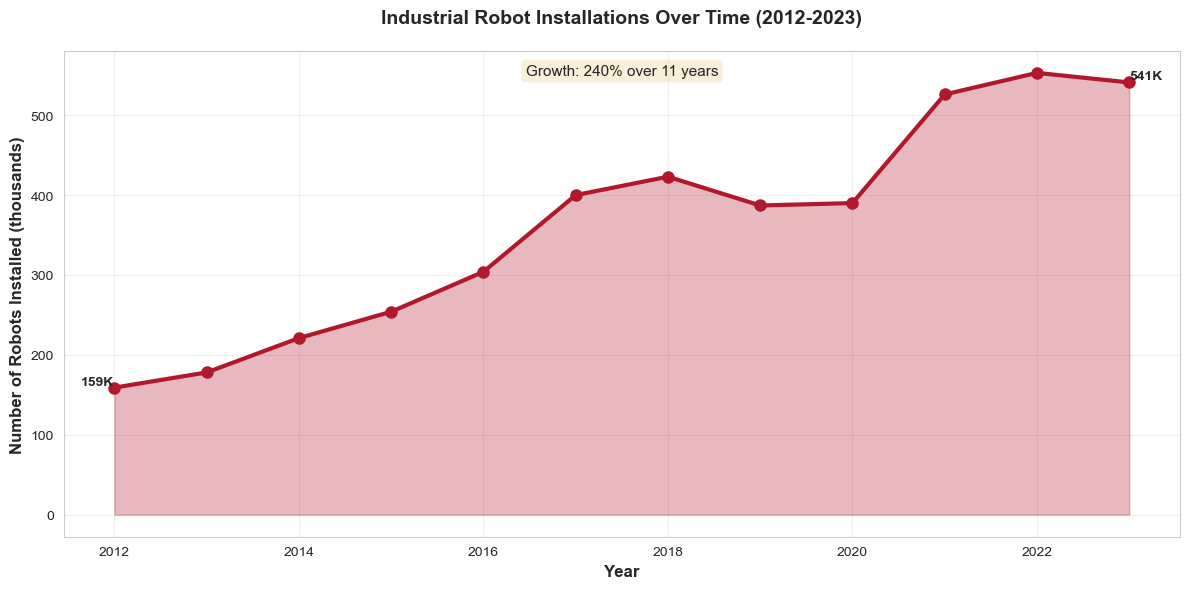

In [7]:
# Load robot data
df_robots = pd.read_csv('../data/4. Economy/Data/fig_4.5.1.csv')

# Create line chart with area fill
fig, ax = plt.subplots(figsize=(12, 6))

# Plot line
ax.plot(df_robots['Year'], df_robots['Number of industrial robots installed (in thousands)'], 
        color='#b2182b', linewidth=3, marker='o', markersize=8, label='Robots Installed')

# Fill area under curve
ax.fill_between(df_robots['Year'], df_robots['Number of industrial robots installed (in thousands)'], 
                 alpha=0.3, color='#b2182b')

ax.set_xlabel('Year', fontsize=12, fontweight='bold')
ax.set_ylabel('Number of Robots Installed (thousands)', fontsize=12, fontweight='bold')
ax.set_title('Industrial Robot Installations Over Time (2012-2023)', fontsize=14, fontweight='bold', pad=20)
ax.grid(alpha=0.3)

# Add value labels for first and last year
first_val = df_robots.iloc[0]['Number of industrial robots installed (in thousands)']
last_val = df_robots.iloc[-1]['Number of industrial robots installed (in thousands)']
ax.text(df_robots.iloc[0]['Year'], first_val, f'{first_val:.0f}K', 
        ha='right', va='bottom', fontsize=10, fontweight='bold')
ax.text(df_robots.iloc[-1]['Year'], last_val, f'{last_val:.0f}K', 
        ha='left', va='bottom', fontsize=10, fontweight='bold')

# Calculate and display growth
growth = ((last_val - first_val) / first_val) * 100
ax.text(0.5, 0.95, f'Growth: {growth:.0f}% over 11 years', 
        transform=ax.transAxes, ha='center', fontsize=11, 
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()


## 7. AI Skill Penetration by Country

Comparing relative AI skill penetration rates across countries (2015-2024), showing global winners and losers.


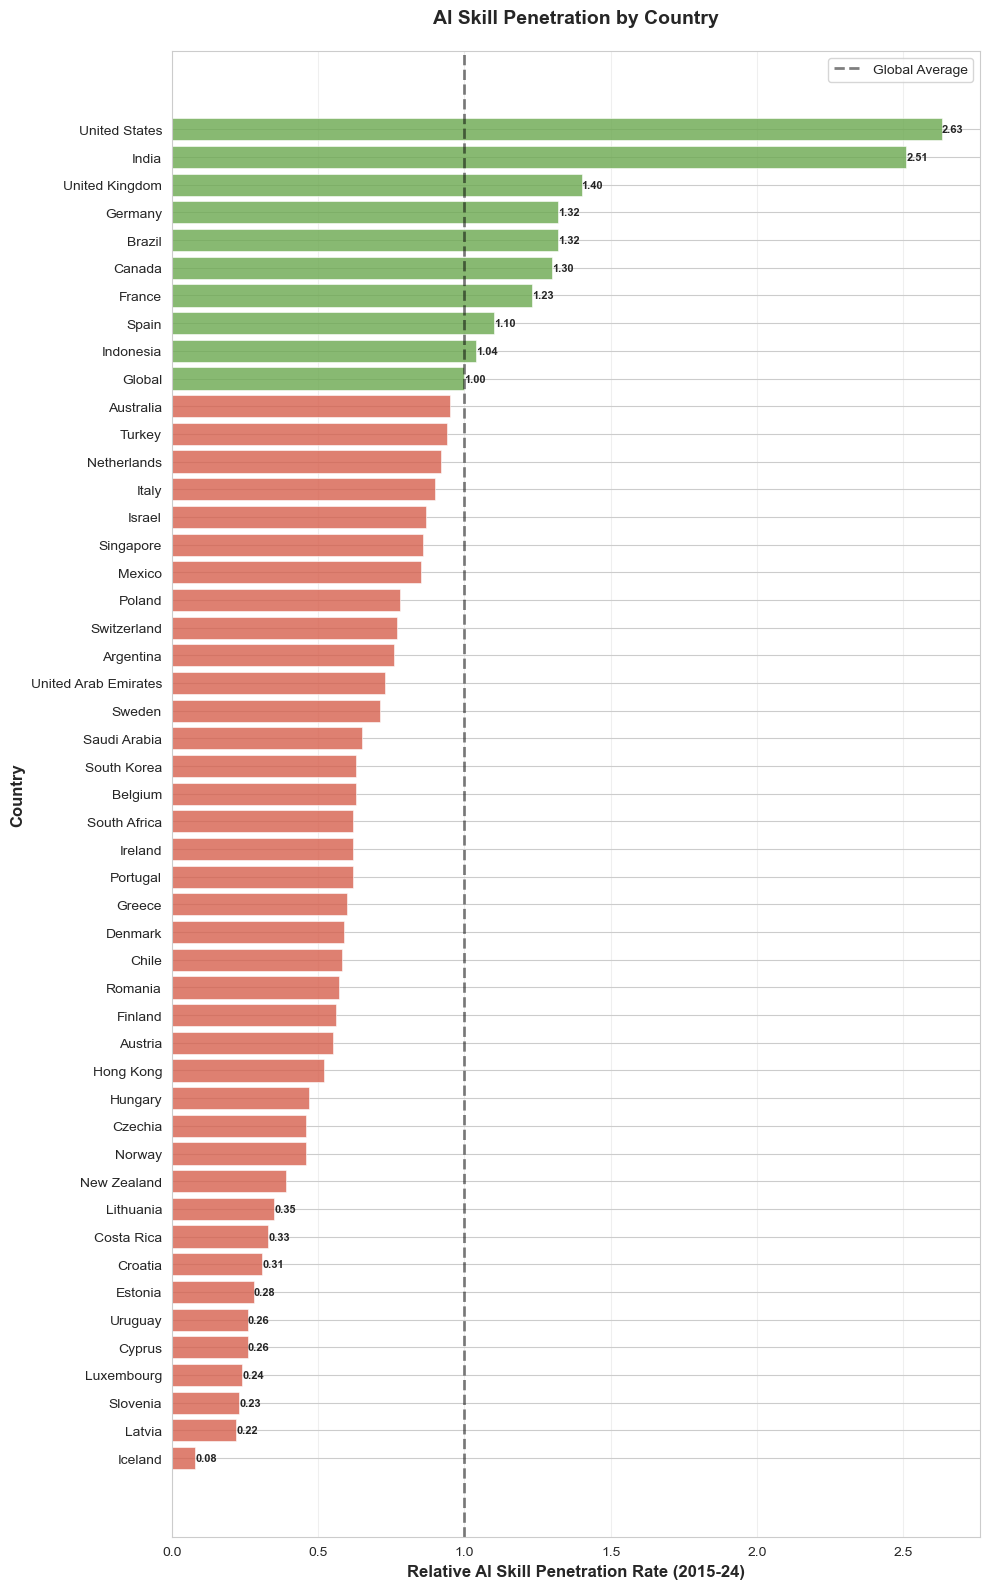


Top 5 Countries:
Geographic area  Relative AI skill penetration rate, 2015-24
  United States                                         2.63
          India                                         2.51
 United Kingdom                                         1.40
        Germany                                         1.32
         Brazil                                         1.32

Bottom 5 Countries:
Geographic area  Relative AI skill penetration rate, 2015-24
        Iceland                                         0.08
         Latvia                                         0.22
       Slovenia                                         0.23
     Luxembourg                                         0.24
        Uruguay                                         0.26


In [8]:
# Load country data
df_countries = pd.read_csv('../data/4. Economy/Data/fig_4.2.15.csv')

# Sort by penetration rate
df_countries_sorted = df_countries.sort_values('Relative AI skill penetration rate, 2015-24', ascending=True)

# Create horizontal bar chart
fig, ax = plt.subplots(figsize=(10, 16))

# Color bars - green for above global average (1.0), red for below
colors = ['#6ba84f' if x >= 1.0 else '#d6604d' for x in df_countries_sorted['Relative AI skill penetration rate, 2015-24']]

bars = ax.barh(df_countries_sorted['Geographic area'], 
               df_countries_sorted['Relative AI skill penetration rate, 2015-24'], 
               color=colors, alpha=0.8, edgecolor='white', linewidth=0.5)

# Add vertical line at global average (1.0)
ax.axvline(x=1.0, color='black', linestyle='--', linewidth=2, alpha=0.5, label='Global Average')

ax.set_xlabel('Relative AI Skill Penetration Rate (2015-24)', fontsize=12, fontweight='bold')
ax.set_ylabel('Country', fontsize=12, fontweight='bold')
ax.set_title('AI Skill Penetration by Country', fontsize=14, fontweight='bold', pad=20)
ax.grid(axis='x', alpha=0.3)
ax.legend()

# Add value labels for top and bottom countries
top_n = 10
for i, (idx, row) in enumerate(df_countries_sorted.iterrows()):
    if i < top_n or i >= len(df_countries_sorted) - top_n:
        ax.text(row['Relative AI skill penetration rate, 2015-24'], i,
                f"{row['Relative AI skill penetration rate, 2015-24']:.2f}",
                ha='left', va='center', fontsize=8, fontweight='bold')

plt.tight_layout()
plt.show()

# Print top and bottom countries
print("\nTop 5 Countries:")
print(df_countries.nlargest(5, 'Relative AI skill penetration rate, 2015-24')[['Geographic area', 'Relative AI skill penetration rate, 2015-24']].to_string(index=False))
print("\nBottom 5 Countries:")
print(df_countries.nsmallest(5, 'Relative AI skill penetration rate, 2015-24')[['Geographic area', 'Relative AI skill penetration rate, 2015-24']].to_string(index=False))


## Summary Insights

These visualizations reveal several key patterns about how AI is impacting jobs:

1. **Employee Expectations**: Companies are becoming more optimistic about workforce changes, with fewer expecting decreases in 2024 vs 2023.

2. **Reskilling**: Massive reskilling efforts are underway, with 46% of companies reskilling >20% of employees in 2024.

3. **Productivity**: AI productivity gains are unevenly distributed, with nearly half seeing modest gains (0-20%) while others see dramatic improvements.

4. **Gender Gap**: Persistent gender inequality in AI jobs, with women representing only ~30% of AI talent (slowly improving).

5. **Geography**: Extreme concentration of AI jobs in a few states (CA: 15.7%, TX: 8.8%, NY: 5.8%).

6. **Automation**: Industrial robot installations have more than tripled since 2012, showing physical automation is accelerating.

7. **Global Skills**: Significant global inequality in AI skill penetration, with US and India leading while many countries lag behind.
